# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import pprint 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
      
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avera
Processing Record 2 of Set 1 | bandarbeyla
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | nouadhibou
Processing Record 7 of Set 1 | gopalpur
Processing Record 8 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 11 of Set 1 | lujan
Processing Record 12 of Set 1 | nara
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | nivala
Processing Record 15 of Set 1 | kralendijk
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | sao filipe
Processing Record 22 of Set 1 | komsomolskiy
Proc

Processing Record 38 of Set 4 | qaqortoq
Processing Record 39 of Set 4 | poum
Processing Record 40 of Set 4 | shelburne
Processing Record 41 of Set 4 | batagay-alyta
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | yulara
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | la asuncion
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | roald
Processing Record 49 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 0 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 5 | alenquer
Processing Record 2 of Set 5 | santa luzia
Processing Record 3 of Set 5 | los llanos de aridane
Processing Record 4 of Set 5 | puksoozero
Processing Record 5 of Set 5 | verin
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | itapirapua
Processing Record 9 of Set 5 | tuktoyaktuk
Processing Record 10 of S

Processing Record 26 of Set 8 | tateyama
Processing Record 27 of Set 8 | broken hill
Processing Record 28 of Set 8 | cidreira
Processing Record 29 of Set 8 | donskoye
Processing Record 30 of Set 8 | dudinka
Processing Record 31 of Set 8 | prince albert
Processing Record 32 of Set 8 | darlawn
Processing Record 33 of Set 8 | deqing
Processing Record 34 of Set 8 | san jose
Processing Record 35 of Set 8 | karratha
Processing Record 36 of Set 8 | provideniya
Processing Record 37 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 8 | yabrud
Processing Record 39 of Set 8 | cururupu
Processing Record 40 of Set 8 | jiayuguan
Processing Record 41 of Set 8 | naryan-mar
Processing Record 42 of Set 8 | voyvozh
Processing Record 43 of Set 8 | college
Processing Record 44 of Set 8 | cotonou
Processing Record 45 of Set 8 | marzuq
Processing Record 46 of Set 8 | caravelas
Processing Record 47 of Set 8 | am timan
Processing Record 48 of Set 8 | pangody
Processing Record 49 

Processing Record 13 of Set 12 | mayo
Processing Record 14 of Set 12 | chaman
Processing Record 15 of Set 12 | verkhoyansk
Processing Record 16 of Set 12 | letlhakane
Processing Record 17 of Set 12 | hearst
Processing Record 18 of Set 12 | myrtle beach
Processing Record 19 of Set 12 | bolshaya sosnova
Processing Record 20 of Set 12 | lanzhou
Processing Record 21 of Set 12 | banska bystrica
Processing Record 22 of Set 12 | marand
Processing Record 23 of Set 12 | severomuysk
Processing Record 24 of Set 12 | tura
Processing Record 25 of Set 12 | isangel
Processing Record 26 of Set 12 | stornoway
Processing Record 27 of Set 12 | saint-georges
Processing Record 28 of Set 12 | sapa
Processing Record 29 of Set 12 | ouesso
Processing Record 30 of Set 12 | saryozek
Processing Record 31 of Set 12 | tsogni
Processing Record 32 of Set 12 | calvinia
Processing Record 33 of Set 12 | pedasi
Processing Record 34 of Set 12 | robstown
Processing Record 35 of Set 12 | kargasok
Processing Record 36 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avera,33.1940,-82.5271,10.73,93,73,2.23,US,1670048720
1,bandarbeyla,9.4942,50.8122,26.93,61,6,9.18,SO,1670048721
2,ushuaia,-54.8000,-68.3000,4.81,65,75,2.06,AR,1670048721
3,bluff,-46.6000,168.3333,12.85,77,100,11.84,NZ,1670048722
4,lebu,-37.6167,-73.6500,12.97,93,88,2.68,CL,1670048723


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avera,33.1940,-82.5271,10.73,93,73,2.23,US,1670048720
1,bandarbeyla,9.4942,50.8122,26.93,61,6,9.18,SO,1670048721
2,ushuaia,-54.8000,-68.3000,4.81,65,75,2.06,AR,1670048721
3,bluff,-46.6000,168.3333,12.85,77,100,11.84,NZ,1670048722
4,lebu,-37.6167,-73.6500,12.97,93,88,2.68,CL,1670048723


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

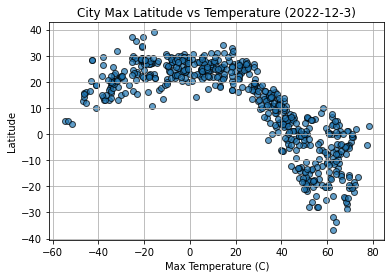

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            edgecolors = "black", alpha = 0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-12-3)")
plt.xlabel("Max Temperature (C)")
plt.ylabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

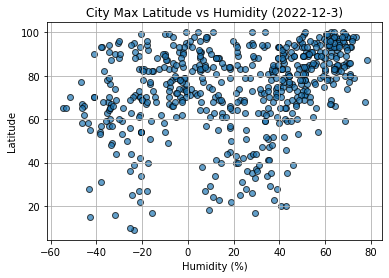

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            edgecolors = "black", alpha = 0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2022-12-3)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

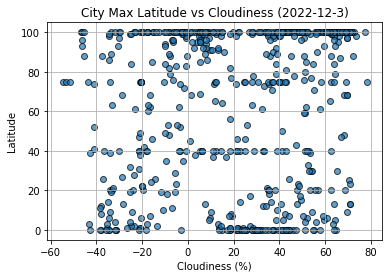

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            edgecolors = "black", alpha = 0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness (2022-12-3)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

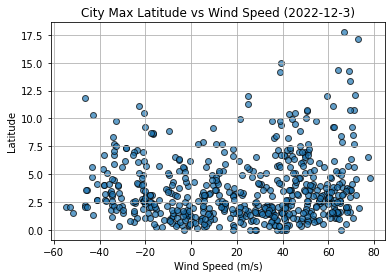

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            edgecolors = "black", alpha = 0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed (2022-12-3)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, xlabel, ylabel, x_a, y_a):
    
    #Get line Eq
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x * slope + intercept
    graph = plt.scatter(x, y)
    
    #Plotting
    plt.plot(x, regress_values, "r-")
    plt.scatter(x, y, edgecolors = "black", alpha = 0.3, c = "#1f77b4")
    
    #graph properties
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(x_a, y_a), fontsize=15,color="red")

    plt.show()
    
    print(f"The r-value is {rvalue}")

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avera,33.1940,-82.5271,10.73,93,73,2.23,US,1670048720
1,bandarbeyla,9.4942,50.8122,26.93,61,6,9.18,SO,1670048721
5,nouadhibou,20.9310,-17.0347,15.99,94,40,6.17,MR,1670048724
6,gopalpur,19.2667,84.9167,26.93,64,7,3.24,IN,1670048724
7,petropavlovsk-kamchatskiy,53.0452,158.6483,-13.67,85,40,1.00,RU,1670048725


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,4.81,65,75,2.06,AR,1670048721
3,bluff,-46.6000,168.3333,12.85,77,100,11.84,NZ,1670048722
4,lebu,-37.6167,-73.6500,12.97,93,88,2.68,CL,1670048723
9,lujan,-34.5703,-59.1050,18.86,91,6,2.20,AR,1670048729
11,port elizabeth,-33.9180,25.5701,20.61,76,75,7.72,ZA,1670048731


###  Temperature vs. Latitude Linear Regression Plot

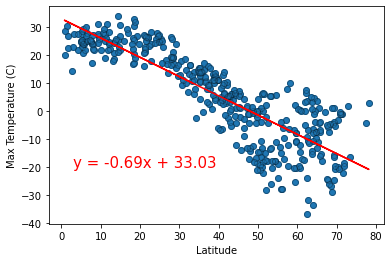

The r-value is -0.8493608412416763


In [47]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], xlabel = "Latitude",
                 ylabel = "Max Temperature (C)", x_a = 3, y_a = -20)

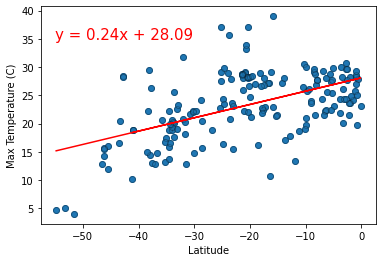

The r-value is 0.5360111674048783


In [48]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], xlabel = "Latitude",
                 ylabel = "Max Temperature (C)", x_a = -55, y_a = 35)

**Discussion about the linear relationship:** 

The linear relationship of the northern and southern hemisphere are both correlated with temperature. The northern hemisphere has a strong positive correlation with temperature (C), whereas the southern hemispher is negatively correlated with temperature (C). 

The opposite correlations is explained as the equator recieves the most sunlight, and as lat --> +inf/-inf, the temperature decreases due to less exposure to sunlight. However, the relationship is may not be strongly correlated as other geographical may effect temperature such as proximity to mountains or bodies of water.

### Humidity vs. Latitude Linear Regression Plot

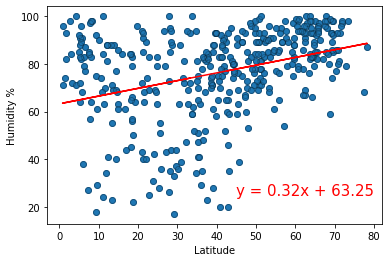

The r-value is 0.34277940080191593


In [49]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], xlabel = "Latitude",
                 ylabel = "Humidity %", x_a = 45, y_a = 25)

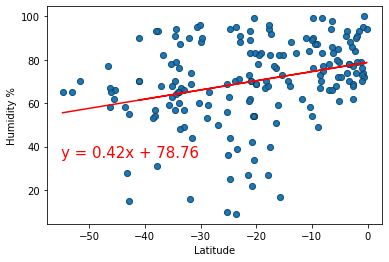

The r-value is 0.3017551085620995


In [50]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], xlabel = "Latitude",
                 ylabel = "Humidity %", x_a = -55, y_a = 35)

**Discussion about the linear relationship:**

Humidity and latitude have a weak positive correlation. This suggest that other factors, like pressure, along with latitude contribute to higher or lower humidity. For example, some geographical areas have prominent mountain ranges, which affect humidity independent of latitude. 


### Cloudiness vs. Latitude Linear Regression Plot

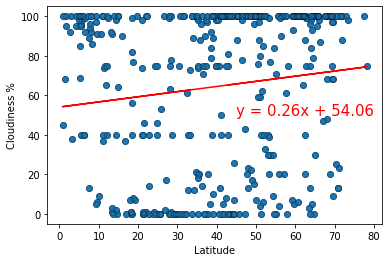

The r-value is 0.13078016753097707


In [51]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], xlabel = "Latitude",
                 ylabel = "Cloudiness %", x_a = 45, y_a = 50)

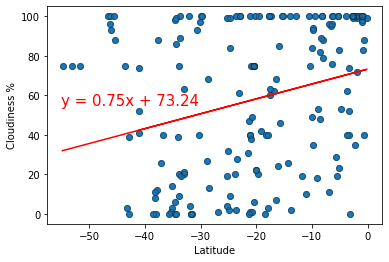

The r-value is 0.27446607807472295


In [52]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], xlabel = "Latitude",
                 ylabel = "Cloudiness %", x_a = -55, y_a = 55)

**Discussion about the linear relationship:** 

The relationship suggest that cloudiness has little or no correlation with lattiude. There is a high degree of variance, and suggest other factors may be more important, such as proximty to large bodies of water.

### Wind Speed vs. Latitude Linear Regression Plot

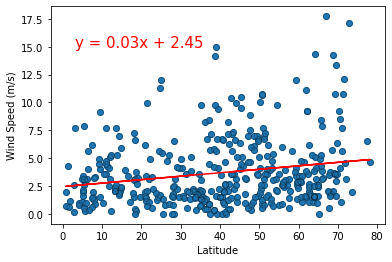

The r-value is 0.2039421585245812


In [53]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], xlabel = "Latitude",
                 ylabel = "Wind Speed (m/s)", x_a = 3, y_a = 15)

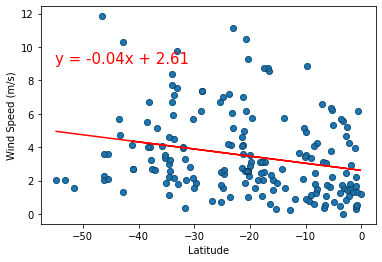

The r-value is -0.2386374873897826


In [54]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], xlabel = "Latitude",
                 ylabel = "Wind Speed (m/s)", x_a = -55, y_a = 9)

**Discussion about the linear relationship:** 

The data suggest that there is little or no correlation between lattitude and wind speed. Other geographical factors may play an more important role such as hills and mountains. 